### K means - EDA

This exercise aims to group up customers given their preferences expressed in the survey.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

xls = pd.ExcelFile('office.xlsx')
sd = pd.read_excel(xls, 'SegmentationData')
cd = pd.read_excel(xls, 'ClassificationData')
sd = sd.drop(['professional', 'income', 'age'], axis = 1)
sd.head(8)

,respondent_id,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy
0,1,8,6,6,3,2,2
1,2,6,3,1,4,7,8
2,3,6,1,2,4,9,6
3,4,8,3,3,4,8,7
4,5,4,6,3,9,2,5
5,6,8,4,3,5,10,6
6,7,7,2,2,2,8,7
7,8,7,5,7,2,2,3


In [2]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   respondent_id       40 non-null     int64
 1   variety_of_choice   40 non-null     int64
 2   electronics         40 non-null     int64
 3   furniture           40 non-null     int64
 4   quality_of_service  40 non-null     int64
 5   low_prices          40 non-null     int64
 6   return_policy       40 non-null     int64
dtypes: int64(7)
memory usage: 2.3 KB


In [3]:
sd.describe()

,respondent_id,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,7.525000,4.575000,3.450000,4.000000,5.050000,4.500000
std,11.690452,1.960998,1.824161,2.363722,2.581989,2.716993,1.811643
min,1.000000,4.000000,1.000000,0.000000,1.000000,1.000000,2.000000
25%,10.750000,6.000000,3.000000,2.000000,2.000000,2.750000,3.000000
50%,20.500000,7.500000,5.000000,3.000000,4.000000,5.000000,5.000000
75%,30.250000,9.250000,6.000000,6.000000,5.000000,7.000000,6.000000
max,40.000000,10.000000,8.000000,7.000000,9.000000,10.000000,8.000000


### Clustering metrics - finding the optimal k

Text(0, 0.5, 'Inertia')

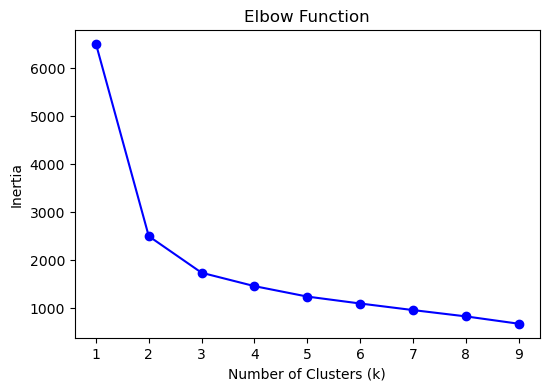

In [4]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sd)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Function')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

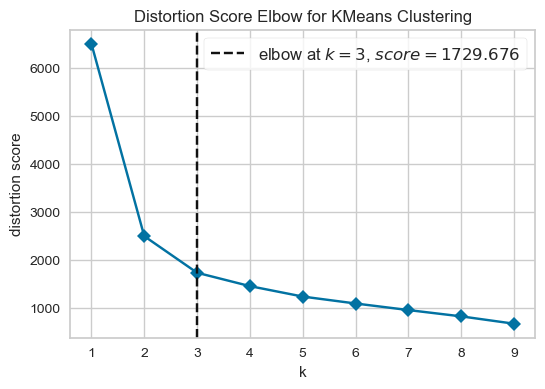

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(6, 4))

visualizer_distortion = KElbowVisualizer(KMeans(random_state=42), k=(1, 10), metric='distortion',timings=False)
visualizer_distortion.fit(sd)
visualizer_distortion.poof()

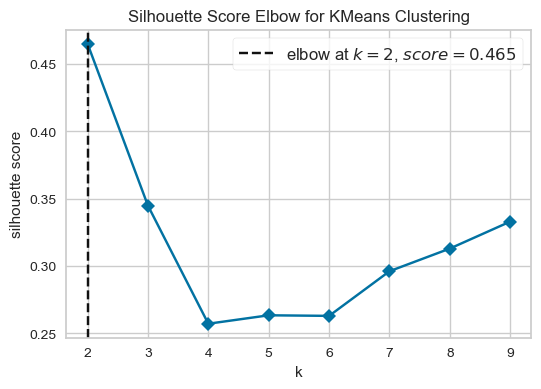

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [6]:
plt.figure(figsize=(6, 4))

visualizer_silhouette = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='silhouette', timings=False)
visualizer_silhouette.fit(sd)
visualizer_silhouette.poof()


## Silhouette score

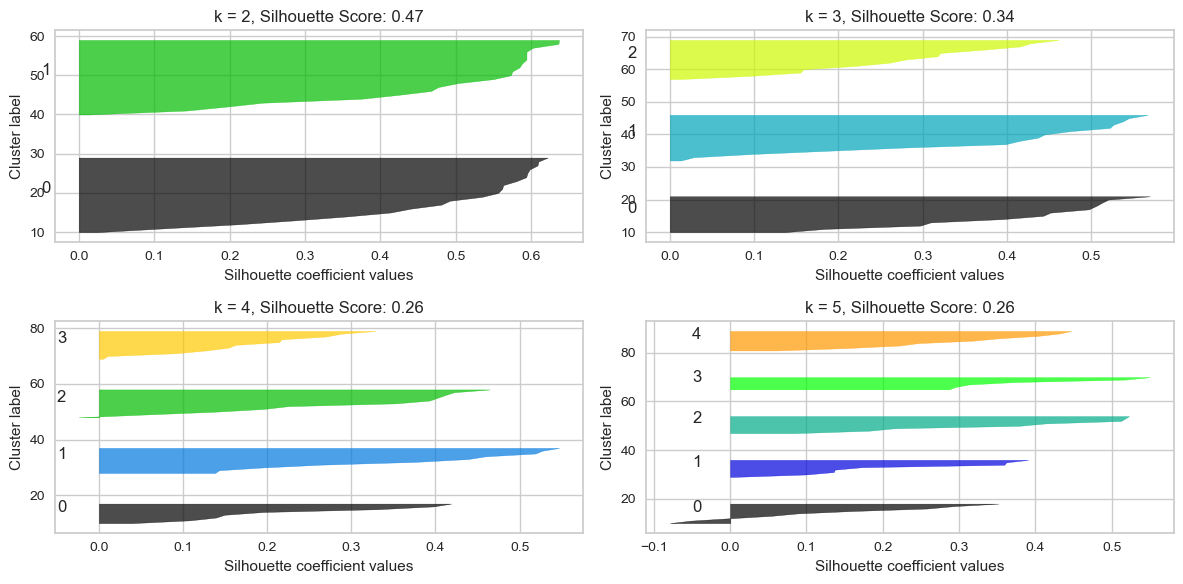

In [7]:
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples

n_clusters_values = [2, 3, 4, 5]

plt.figure(figsize=(12, 6))

for i, n_clusters in enumerate(n_clusters_values):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(sd)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(sd, cluster_labels)

    sample_silhouette_values = silhouette_samples(sd, cluster_labels)
    
    plt.subplot(2, 2, i + 1)

    y_lower = 10
    for j in range(n_clusters):
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()
        
        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        
        y_lower = y_upper + 10

    plt.title(f'k = {n_clusters}, Silhouette Score: {silhouette_avg:.2f}')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')

plt.tight_layout()
plt.show()

k=2 and k=3 shows better cluster split

## 3 Segments solution using K-Means (from sklearn package)


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = kmeans.fit_predict(sd)
cluster_labels = cluster_labels + 1

sd['Cluster'] = cluster_labels
sd.head(8)

,respondent_id,variety_of_choice,electronics,furniture,quality_of_service,low_prices,return_policy,Cluster
0,1,8,6,6,3,2,2,2
1,2,6,3,1,4,7,8,2
2,3,6,1,2,4,9,6,2
3,4,8,3,3,4,8,7,2
4,5,4,6,3,9,2,5,2
5,6,8,4,3,5,10,6,2
6,7,7,2,2,2,8,7,2
7,8,7,5,7,2,2,3,2


In [9]:
cluster_counts = sd['Cluster'].value_counts().sort_index()
percentage_coverage = (cluster_counts / len(sd)) * 100

cluster_info = pd.DataFrame({'Count': cluster_counts, 'Percentage': percentage_coverage})
cluster_info.index.name = 'Cluster'
cluster_info = cluster_info.T
cluster_info

Cluster,1,2,3
Count,12.0,15.0,13.0
Percentage,30.0,37.5,32.5


In [10]:
means_by_cluster = sd.groupby('Cluster').mean()

df = pd.DataFrame(means_by_cluster)
df = means_by_cluster.T
df

Cluster,1,2,3
respondent_id,34.500000,8.000000,22.000000
variety_of_choice,8.000000,7.000000,7.692308
electronics,4.583333,4.466667,4.692308
furniture,3.333333,3.133333,3.923077
quality_of_service,3.500000,3.933333,4.538462
low_prices,5.666667,5.466667,4.000000
return_policy,4.333333,5.066667,4.000000
